## Machine Learning Models

In [1]:
# for clear plotting on Macs
%config InlineBackend.figure_format='retina'

In [2]:
import pandas as pd
import numpy as np
import os
path = "/Users/yangshining/Desktop/DUKE/2022spring/ids705/final_project/705-FinalProject/15_modified_data/"

In [17]:
train_original = pd.read_csv(path+"train_data.csv")
val_original = pd.read_csv(path+"val_data.csv")
test_original = pd.read_csv(path+"test_data.csv")

In [5]:
train_original.head(10)

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2019-09-24 06:30:00,2019-09-24 06:45:00,802.0,6.183132,10.0,3,2.55,False,1,2019-09-24,LINCOLN PARK,NEAR WEST SIDE,2019,September,24,Tuesday,6,0,1
1,2019-07-30 11:45:00,2019-07-30 12:30:00,2349.0,18.248731,35.0,0,8.11,False,1,2019-07-30,OHARE,NEAR NORTH SIDE,2019,July,30,Tuesday,11,0,0
2,2018-11-17 01:15:00,2018-11-17 01:30:00,684.0,5.277118,10.0,0,2.50,False,1,2018-11-17,NEAR NORTH SIDE,NORTH CENTER,2018,November,17,Saturday,1,1,0
3,2019-12-09 12:00:00,2019-12-09 12:15:00,698.0,3.079843,7.5,1,2.55,False,1,2019-12-09,WEST TOWN,NEAR WEST SIDE,2019,December,9,Monday,12,0,1
4,2018-12-17 15:00:00,2018-12-17 15:00:00,812.0,2.996371,7.5,0,2.50,False,1,2018-12-17,SOUTH SHORE,GREATER GRAND CROSSING,2018,December,17,Monday,15,0,0
5,2018-12-03 09:30:00,2018-12-03 09:45:00,569.0,1.415615,5.0,0,0.00,True,3,2018-12-03,NEAR NORTH SIDE,LOOP,2018,December,3,Monday,9,0,0
6,2019-08-23 14:15:00,2019-08-23 14:30:00,1297.0,5.171532,12.5,0,2.55,False,1,2019-08-23,UPTOWN,NEAR NORTH SIDE,2019,August,23,Friday,14,1,0
7,2018-12-15 17:30:00,2018-12-15 17:45:00,1541.0,7.953680,7.5,0,2.50,True,2,2018-12-15,LOOP,BRIGHTON PARK,2018,December,15,Saturday,17,1,0
8,2019-07-19 09:30:00,2019-07-19 10:00:00,1921.0,15.367562,22.5,4,7.55,False,1,2019-07-19,NEAR NORTH SIDE,GARFIELD RIDGE,2019,July,19,Friday,9,1,1
9,2019-02-14 18:45:00,2019-02-14 18:45:00,172.0,0.887416,2.5,0,2.55,False,1,2019-02-14,LOOP,NEAR SOUTH SIDE,2019,February,14,Thursday,18,0,0


In [6]:
len(train_original.columns)

19

In [22]:
train_original[train_original["fare"] > 100]

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
13383,2020-01-28 10:15:00,2020-01-28 19:45:00,33647.0,15.950901,225.0,0,5.39,False,1,2020-01-28,LOOP,NEAR WEST SIDE,2020,January,28,Tuesday,10,0,0
17765,2019-10-06 16:45:00,2019-10-06 17:30:00,2989.0,19.150000,117.5,0,7.10,False,1,2019-10-06,NEAR NORTH SIDE,OHARE,2019,October,6,Sunday,16,1,0
18828,2019-06-13 09:00:00,2019-06-13 09:30:00,1976.0,18.422883,105.0,0,7.86,False,1,2019-06-13,NEAR NORTH SIDE,OHARE,2019,June,13,Thursday,9,0,0
19842,2019-07-20 17:00:00,2019-07-20 17:30:00,1833.0,16.781689,102.5,0,2.10,False,1,2019-07-20,ENGLEWOOD,ENGLEWOOD,2019,July,20,Saturday,17,1,0
30532,2019-07-24 11:15:00,2019-07-24 11:45:00,2449.0,28.394332,112.5,0,7.10,False,1,2019-07-24,NEAR NORTH SIDE,OHARE,2019,July,24,Wednesday,11,0,0
40375,2019-05-18 15:30:00,2019-05-18 17:00:00,4970.0,29.293925,102.5,0,8.30,False,1,2019-05-18,NEAR SOUTH SIDE,OHARE,2019,May,18,Saturday,15,1,0
42563,2019-06-05 17:30:00,2019-06-05 18:45:00,4735.0,18.118195,132.5,0,7.85,False,1,2019-06-05,NEAR NORTH SIDE,OHARE,2019,June,5,Wednesday,17,0,0
43344,2019-05-05 06:00:00,2019-05-05 07:15:00,3923.0,39.874095,105.0,5,7.55,False,1,2019-05-05,LOOP,OHARE,2019,May,5,Sunday,6,1,1
66167,2019-01-07 06:15:00,2019-01-07 07:15:00,3975.0,19.174191,120.0,19,7.70,False,1,2019-01-07,NEAR NORTH SIDE,OHARE,2019,January,7,Monday,6,0,1
77439,2019-10-23 11:15:00,2019-10-23 12:00:00,2442.0,18.100000,107.5,29,7.10,False,1,2019-10-23,OHARE,LOOP,2019,October,23,Wednesday,11,0,1


In [23]:
train_original["additional_charges"].describe()

count    83703.000000
mean         2.787474
std          1.672035
min          0.000000
25%          2.550000
50%          2.550000
75%          2.550000
max         21.550000
Name: additional_charges, dtype: float64

Combine train + val and encode

In [7]:
data = pd.concat([train_original, val_original, test_original], keys=[0, 1, 2])
data = data[
    data.columns.difference(["trip_start_timestamp", "trip_end_timestamp", "date"])
]
# re-organize the order of the columns
data = data[
    [
        "year",
        "month",
        "day",
        "day_of_week",
        "weekend",
        "hour",
        "fare",
        "tip",
        "nonzero_tip",
        "additional_charges",
        "shared_trip_authorized",
        "trips_pooled",
        "trip_miles",
        "trip_seconds",
        "pickup_community_name",
        "dropoff_community_name",
    ]
]

# convert shared_trip_authorized to a dummy
data["shared_trip_authorized"] = np.where(
    data["shared_trip_authorized"] == "True", 1, 0
)
data.head(10)


year      month  day day_of_week  weekend  hour  fare  tip  nonzero_tip  \
0 0  2019  September   24     Tuesday        0     6  10.0    3            1   
  1  2019       July   30     Tuesday        0    11  35.0    0            0   
  2  2018   November   17    Saturday        1     1  10.0    0            0   
  3  2019   December    9      Monday        0    12   7.5    1            1   
  4  2018   December   17      Monday        0    15   7.5    0            0   
  5  2018   December    3      Monday        0     9   5.0    0            0   
  6  2019     August   23      Friday        1    14  12.5    0            0   
  7  2018   December   15    Saturday        1    17   7.5    0            0   
  8  2019       July   19      Friday        1     9  22.5    4            1   
  9  2019   February   14    Thursday        0    18   2.5    0            0   

     additional_charges  shared_trip_authorized  trips_pooled  trip_miles  \
0 0                2.55                       0             1    6.183132   
  1                8.11                       0             1   18.248731   
  2                2.50                       0             1    5.277118   
  3                2.55                       0             1    3.079843   
  4                2.50                       0             1    2.996371   
  5                0.00                       0             3    1.415615   
  6                2.55                       0             1    5.171532   
  7                2.50                       0             2    7.953680   
  8                7.55                       0             1   15.367562   
  9                2.55                       0             1    0.887416   

     trip_seconds pickup_community_name  dropoff_community_name  
0 0         802.0          LINCOLN PARK          NEAR WEST SIDE  
  1        2349.0                 OHARE         NEAR NORTH SIDE  
  2         684.0       NEAR NORTH SIDE            NORTH CENTER  
  3         698.0             WEST TOWN          NEAR WEST SIDE  
  4         812.0           SOUTH SHORE  GREATER GRAND CROSSING  
  5         569.0       NEAR NORTH SIDE                    LOOP  
  6        1297.0                UPTOWN         NEAR NORTH SIDE  
  7        1541.0                  LOOP           BRIGHTON PARK  
  8        1921.0       NEAR NORTH SIDE          GARFIELD RIDGE  
  9         172.0                  LOOP         NEAR SOUTH SIDE

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 119576 entries, (0, 0) to (2, 23915)
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    119576 non-null  int64  
 1   month                   119576 non-null  object 
 2   day                     119576 non-null  int64  
 3   day_of_week             119576 non-null  object 
 4   weekend                 119576 non-null  int64  
 5   hour                    119576 non-null  int64  
 6   fare                    119576 non-null  float64
 7   tip                     119576 non-null  int64  
 8   nonzero_tip             119576 non-null  int64  
 9   additional_charges      119576 non-null  float64
 10  shared_trip_authorized  119576 non-null  int64  
 11  trips_pooled            119576 non-null  int64  
 12  trip_miles              119576 non-null  float64
 13  trip_seconds            119576 non-null  float64
 14  pickup_comm

In [9]:
encode = pd.get_dummies(data)
encode.head(10)

year  day  weekend  hour  fare  tip  nonzero_tip  additional_charges  \
0 0  2019   24        0     6  10.0    3            1                2.55   
  1  2019   30        0    11  35.0    0            0                8.11   
  2  2018   17        1     1  10.0    0            0                2.50   
  3  2019    9        0    12   7.5    1            1                2.55   
  4  2018   17        0    15   7.5    0            0                2.50   
  5  2018    3        0     9   5.0    0            0                0.00   
  6  2019   23        1    14  12.5    0            0                2.55   
  7  2018   15        1    17   7.5    0            0                2.50   
  8  2019   19        1     9  22.5    4            1                7.55   
  9  2019   14        0    18   2.5    0            0                2.55   

     shared_trip_authorized  trips_pooled  ...  \
0 0                       0             1  ...   
  1                       0             1  ...   
  2                       0             1  ...   
  3                       0             1  ...   
  4                       0             1  ...   
  5                       0             3  ...   
  6                       0             1  ...   
  7                       0             2  ...   
  8                       0             1  ...   
  9                       0             1  ...   

     dropoff_community_name_WASHINGTON HEIGHTS  \
0 0                                          0   
  1                                          0   
  2                                          0   
  3                                          0   
  4                                          0   
  5                                          0   
  6                                          0   
  7                                          0   
  8                                          0   
  9                                          0   

     dropoff_community_name_WASHINGTON PARK  \
0 0                                       0   
  1                                       0   
  2                                       0   
  3                                       0   
  4                                       0   
  5                                       0   
  6                                       0   
  7                                       0   
  8                                       0   
  9                                       0   

     dropoff_community_name_WEST ELSDON  \
0 0                                   0   
  1                                   0   
  2                                   0   
  3                                   0   
  4                                   0   
  5                                   0   
  6                                   0   
  7                                   0   
  8                                   0   
  9                                   0   

     dropoff_community_name_WEST ENGLEWOOD  \
0 0                                      0   
  1                                      0   
  2                                      0   
  3                                      0   
  4                                      0   
  5                                      0   
  6                                      0   
  7                                      0   
  8                                      0   
  9                                      0   

     dropoff_community_name_WEST GARFIELD PARK  \
0 0                                          0   
  1                                          0   
  2                                          0   
  3                                          0   
  4                                          0   
  5                                          0   
  6                                          0   
  7                                          0   
  8                                          0   
  9                                          0   

     

Split training and validation set

In [10]:
train, val, test = encode.xs(0),encode.xs(1), encode.xs(2)

Split X and y (for binary classification)

In [11]:
X_train = train[train.columns.difference(["nonzero_tip", "tip"])].to_numpy()
y_train = train[["nonzero_tip"]].to_numpy()
X_val = val[val.columns.difference(["nonzero_tip", "tip"])].to_numpy()
y_val = val[["nonzero_tip"]].to_numpy()
X_test = test[test.columns.difference(["nonzero_tip", "tip"])].to_numpy()
y_test = test[["nonzero_tip"]].to_numpy()

In [13]:
X_train.shape

(83703, 183)

Random guess

In [80]:
# random guess
c1_idx = np.where(y_train == 1)[0]
c0_idx = np.where(y_train == 0)[0]
fraction_positive_examples = len(c1_idx) / (len(c1_idx) + len(c0_idx))
1-fraction_positive_examples

0.8202095504342736

In [35]:
# import statements
import time
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.combine import SMOTEENN
import xgboost as xgb
import lightgbm as lgb

### RF

Default

In [64]:
rf = RandomForestClassifier(n_estimators=2500, n_jobs=-1)
pipe_rf = Pipeline(steps=[("scaler", StandardScaler()), ("model", rf)])
pipe_rf.fit(X_train, y_train.ravel())
pipe_rf.score(X_val, y_val)

0.8207744417496028

class_weight = “balanced”

In [65]:
rf = RandomForestClassifier(n_estimators=2500, class_weight="balanced", n_jobs=-1)
pipe_rf = Pipeline(steps=[("scaler", StandardScaler()), ("model", rf)])
pipe_rf.fit(X_train, y_train.ravel())
pipe_rf.score(X_val, y_val)

0.8204399096763402

class_weight = "balanced_subsample"

In [66]:
rf = RandomForestClassifier(n_estimators=2500, class_weight="balanced_subsample", n_jobs=-1)
pipe_rf = Pipeline(steps=[("scaler", StandardScaler()), ("model", rf)])
pipe_rf.fit(X_train, y_train.ravel())
pipe_rf.score(X_val, y_val)

0.8204399096763402

In [16]:
balanced_rf = BalancedRandomForestClassifier(n_estimators=2500, n_jobs=-1)
pipe_brf = Pipeline(steps=[("scaler", StandardScaler()), ("model", balanced_rf)])
pipe_brf.fit(X_train, y_train.ravel())
pipe_brf.score(X_val, y_val)

0.5794931839090073

oversampling + undersampling

In [31]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 68654, 1: 15049}

In [32]:
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 26717, 1: 62019}

In [33]:
rf = RandomForestClassifier(n_estimators=2500, n_jobs=-1)
pipe_rf = Pipeline(steps=[("scaler", StandardScaler()), ("model", rf)])
pipe_rf.fit(X_resampled, y_resampled.ravel())
pipe_rf.score(X_val, y_val)

0.7485155139248976

Tuning hyperparameter using random search

In [85]:
param_rf = {#'bootstrap': [True, False],
 'model__max_depth': [10, 20, 50, 75, None],
 'model__max_features': ['auto', 'sqrt'],
 'model__min_samples_leaf': [1, 2, 4],
 'model__min_samples_split': [2, 5, 10],
 'model__n_estimators': [500, 800, 1000, 1500, 2000, 2500, 3000]}

# subsample for model tuning
from sklearn.model_selection import train_test_split
# keep 30% as tuning set 
X_tune, _, y_tune, _ = train_test_split(X_train, y_train, train_size = 0.3)

search = RandomizedSearchCV(pipe_rf, param_distributions=param_rf, verbose=2, n_iter=100, n_jobs=-1)
search.fit(X_tune, np.ravel(y_tune))
prob_rf1 = search.predict_proba(X_val)[:,1]
print(search.best_params_)
print("best score:", search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=2000; total time= 1.6min
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=2000; total time= 1.6min
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=2000; total time= 1.6min
[CV] END model__max_depth=75, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=2000; total time= 2.8min
[CV] END model__max_depth=75, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=2000; total time= 2.9min
[CV] END model__max_depth=75, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=2000; total time= 2.9mi

### Boosting (XGBoost)

In [67]:
xgbc = xgb.XGBClassifier(use_label_encoder=False, tree_method="hist")
pipe_xgb = Pipeline(steps=[("scaler", StandardScaler()), ("model", xgbc)])
pipe_xgb.fit(X_train, np.ravel(y_train))
pipe_xgb.score(X_val, np.ravel(y_val))

[15:55:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8227816341891779

In [81]:
xgbc = xgb.XGBClassifier(use_label_encoder=False, eta=0.1, gamma=5, max_depth=4, tree_method="hist")
pipe_xgb = Pipeline(steps=[("scaler", StandardScaler()), ("model", xgbc)])
pipe_xgb.fit(X_train, np.ravel(y_train))
pipe_xgb.score(X_val, np.ravel(y_val))
prob_xgb = pipe_xgb.predict_proba(X_val)[:,1]

[12:03:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Sensitivity vs specificity

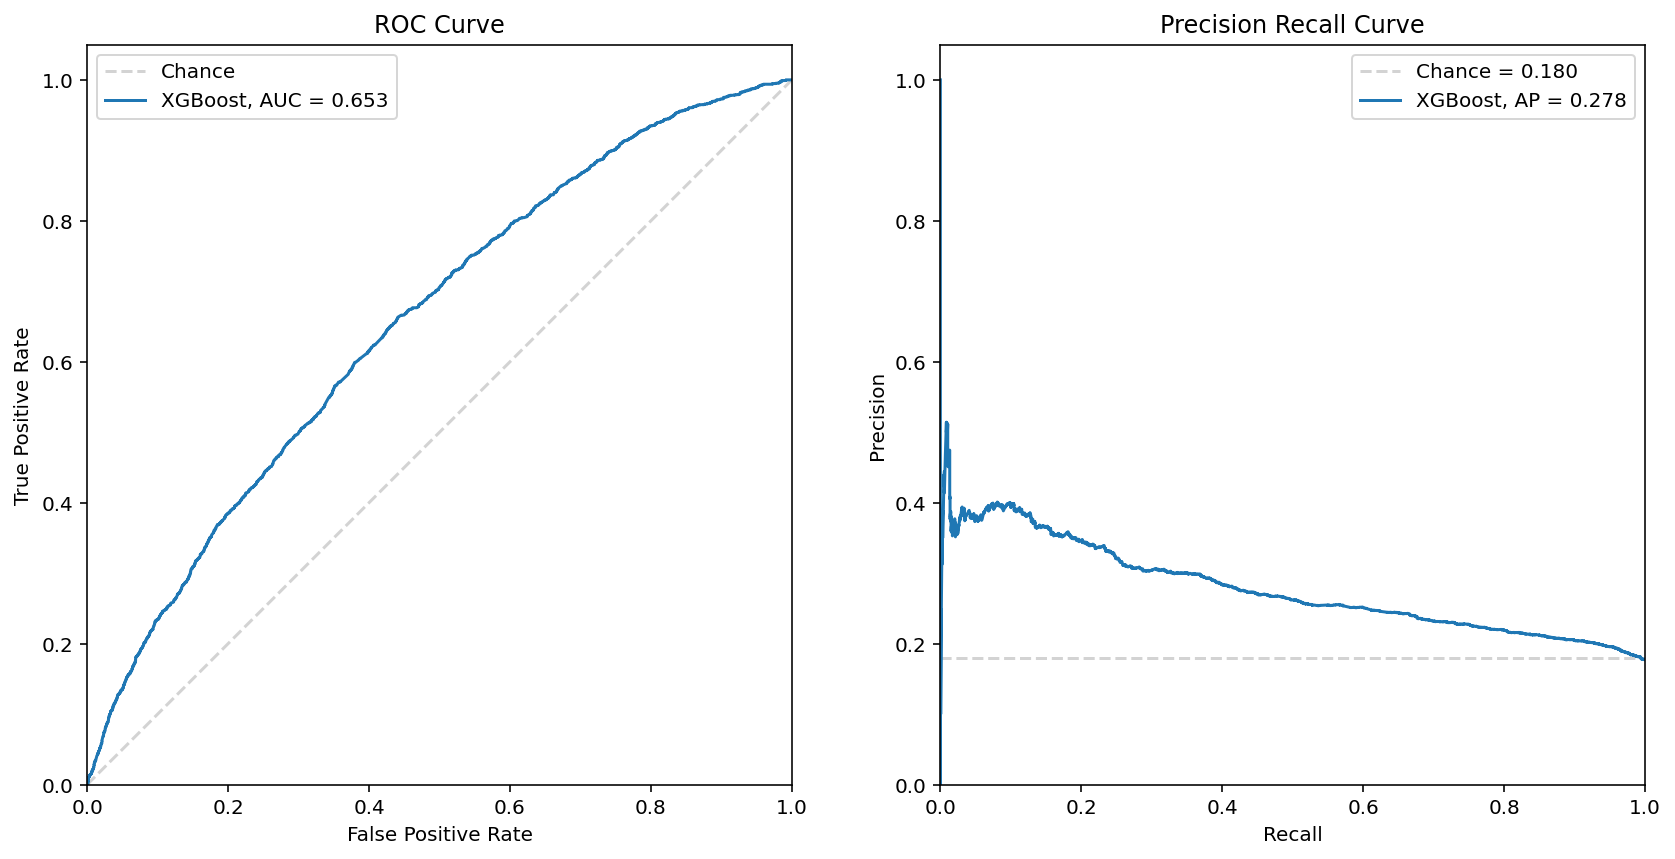

In [83]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Initialize each plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the chance diagonal and PR random chance lines
axs[0].plot((0, 1), (0, 1), color="lightgrey", linestyle="--", label="Chance")
axs[1].plot(
    (0, 1),
    (fraction_positive_examples, fraction_positive_examples),
    color="lightgrey",
    linestyle="--",
    label="Chance = {:.3f}".format(fraction_positive_examples),
)
score = prob_xgb
fpr, tpr, _ = roc_curve(y_val, score)
precision, recall, _ = precision_recall_curve(y_val, score)
roc_auc = auc(fpr, tpr)
ap = average_precision_score(y_val, score)
    
# Plot the ROC curve
axs[0].plot(fpr, tpr, label="XGBoost" + ', AUC = {:.3f}'.format(roc_auc))

# Plot the PR curve
axs[1].plot(recall, precision, label= "XGBoost" + ', AP = {:.3f}'.format(ap))

for ax in axs:
    ax.axis('square')
    ax.set(xlim=(0,1), ylim=(0,1.05))
    ax.legend()
axs[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curve')
axs[1].set(xlabel='Recall', ylabel='Precision', title='Precision Recall Curve')
plt.tight_layout()
plt.show()

Tuning XGBoost  


Parameter:  
- eta (learning rate)
- gamma (minimum loss reduction required to make a split)
- max_depth (typically 3-10)


In [75]:
# set up random search
param_xgb = {
 'model__eta': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'model__gamma': [1, 2, 3, 4, 5, 6],
 'model__max_depth': [1, 2, 3, 4, 5]}


search = RandomizedSearchCV(pipe_xgb, param_distributions=param_xgb, n_iter=500, cv=10, n_jobs=-1)
search.fit(X_train, np.ravel(y_train))
prob_xgb = search.predict_proba(X_val)[:,1]
print(search.best_params_)
print("best score:", search.best_score_)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


/Users/yangshining/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 210 is smaller than n_iter=500. Running 210 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[16:00:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:14] WARNING: /Users/runner/miniforge3/cond

### LightGBM

In [76]:
lightgbm = lgb.LGBMClassifier(n_estimators=500, n_jobs=-1)
pipe_lgb = Pipeline(steps=[("scaler", StandardScaler()), ("model", lightgbm)])
pipe_lgb.fit(X_train, y_train.ravel())
pipe_lgb.score(X_val, y_val.ravel())

0.8214435058961278

In [79]:
lightgbm = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4, num_leaves=16, n_jobs=-1)
pipe_lgb = Pipeline(steps=[("scaler", StandardScaler()), ("model", lightgbm)])
pipe_lgb.fit(X_train, y_train.ravel())
pipe_lgb.score(X_val, y_val.ravel())

0.8220289370243372

tuning hyperparameter

In [47]:
param = {#'bootstrap': [True, False],
 'model__max_depth': [10, 20, 50, 75, 80, None],
 'model__max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'model__n_estimators': [500, 800, 1000, 1500, 2000, 2500, 3000]}


search = RandomizedSearchCV(pipe_rf, param_distributions=param, verbose=2, n_iter=100, n_jobs=-1)
search.fit(X_train, np.ravel(y_train))
prob_rf1 = search.predict_proba(X_val)[:,1]
print(search.best_params_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


/Users/yangshining/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 84 is smaller than n_iter=100. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=500; total time= 1.4min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.2min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.2min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.2min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.3min
[CV] END model__max_depth=10, model__max_features=auto, model__n_estimators=800; total time= 2.3min


KeyboardInterrupt: 

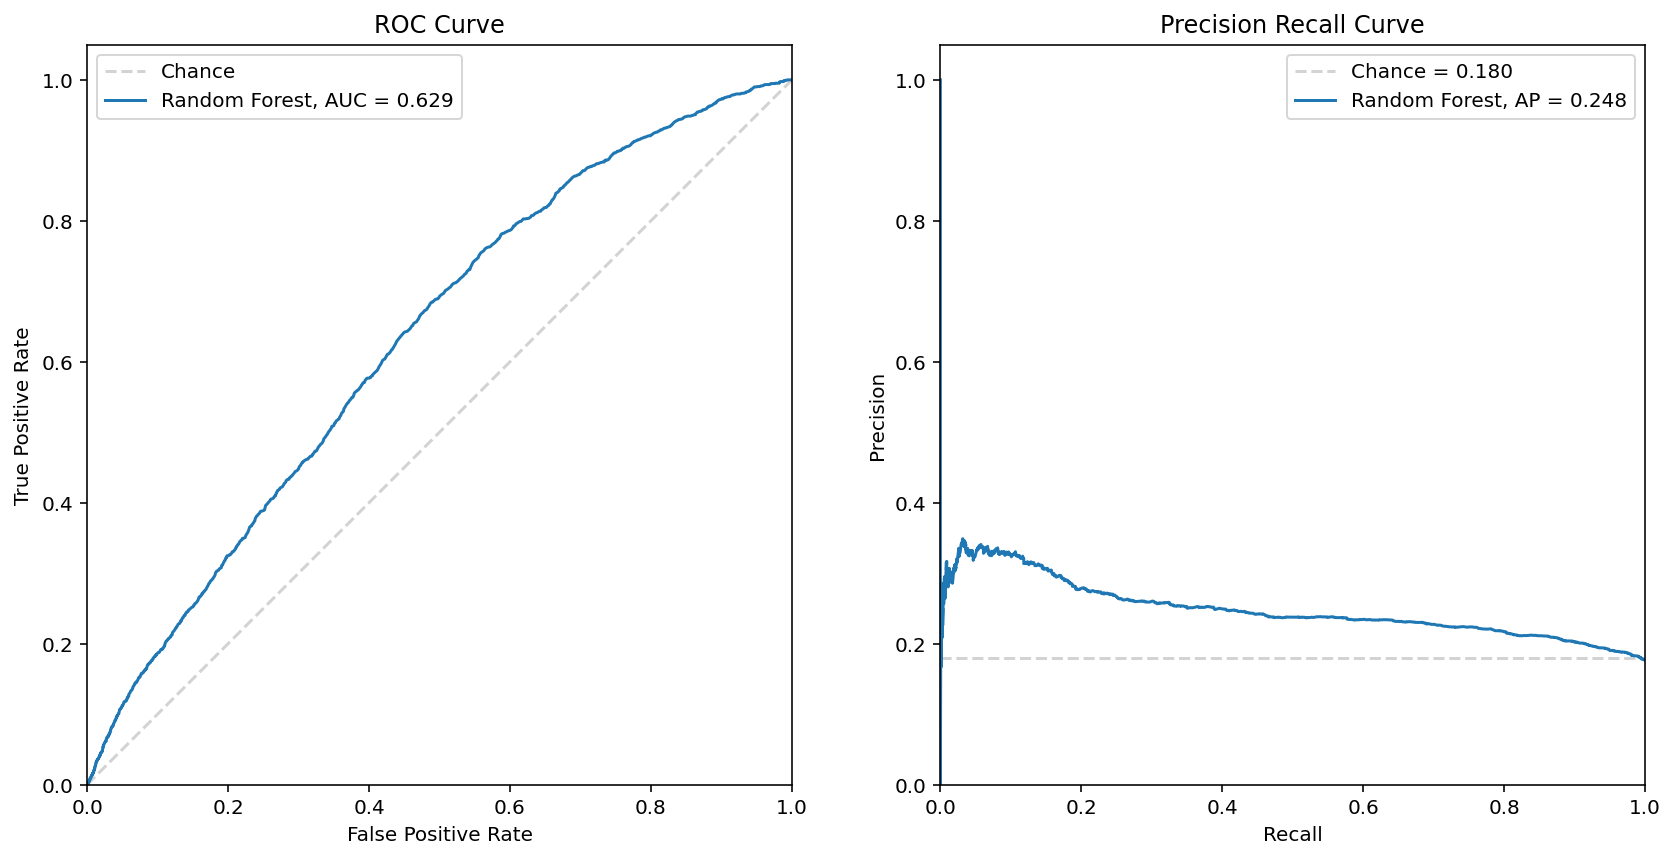

In [53]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Initialize each plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the chance diagonal and PR random chance lines
axs[0].plot((0, 1), (0, 1), color="lightgrey", linestyle="--", label="Chance")
axs[1].plot(
    (0, 1),
    (fraction_positive_examples, fraction_positive_examples),
    color="lightgrey",
    linestyle="--",
    label="Chance = {:.3f}".format(fraction_positive_examples),
)
score = prob_rf
fpr, tpr, _ = roc_curve(y_val, score)
precision, recall, _ = precision_recall_curve(y_val, score)
roc_auc = auc(fpr, tpr)
ap = average_precision_score(y_val, score)
    
# Plot the ROC curve
axs[0].plot(fpr, tpr, label="Random Forest" + ', AUC = {:.3f}'.format(roc_auc))

# Plot the PR curve
axs[1].plot(recall, precision, label= "Random Forest" + ', AP = {:.3f}'.format(ap))

for ax in axs:
    ax.axis('square')
    ax.set(xlim=(0,1), ylim=(0,1.05))
    ax.legend()
axs[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curve')
axs[1].set(xlabel='Recall', ylabel='Precision', title='Precision Recall Curve')
plt.tight_layout()
plt.show()